In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ten2mat(tensor, mode):
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1), order = 'F')

def mat2ten(mat, dim, mode):
    index = list()
    index.append(mode)
    for i in range(dim.shape[0]):
        if i != mode:
            index.append(i)
    return np.moveaxis(np.reshape(mat, list(dim[index]), order = 'F'), 0, mode)

In [2]:
import scipy.io as scio
import sys
dense_tensor = scio.loadmat('data/G/Guangzhou.mat')['Guangzhou']
dense_mat = ten2mat(dense_tensor, 0)
missing_rate = 0.8
np.random.seed(1000)
dim1, dim2, dim3 = dense_tensor.shape

In [4]:
# Random Missing (RM)
omega_tensor = np.round(np.random.rand(dim1, dim2, dim3) + 0.5 - missing_rate)
omega_mat = ten2mat(omega_tensor, 0)
sparse_tensor = dense_tensor*omega_tensor
sparse_mat = ten2mat(sparse_tensor, 0)

scio.savemat(r'results\G_RM_80.mat', mdict={'omega_tensor':omega_tensor})

In [6]:
# Non-random Missing (NM)
sparse_tensor = dense_tensor * np.round(np.random.rand(dim1, dim3) + 0.5 - missing_rate)[:, None, :]
sparse_mat = ten2mat(sparse_tensor, 0)
omega_tensor = np.ones(dense_tensor.shape)
omega_tensor = sparse_tensor==0
omega_mat = ten2mat(omega_tensor, 0)

scio.savemat(r'results\G_NM_80.mat', mdict={'omega_tensor':omega_tensor})

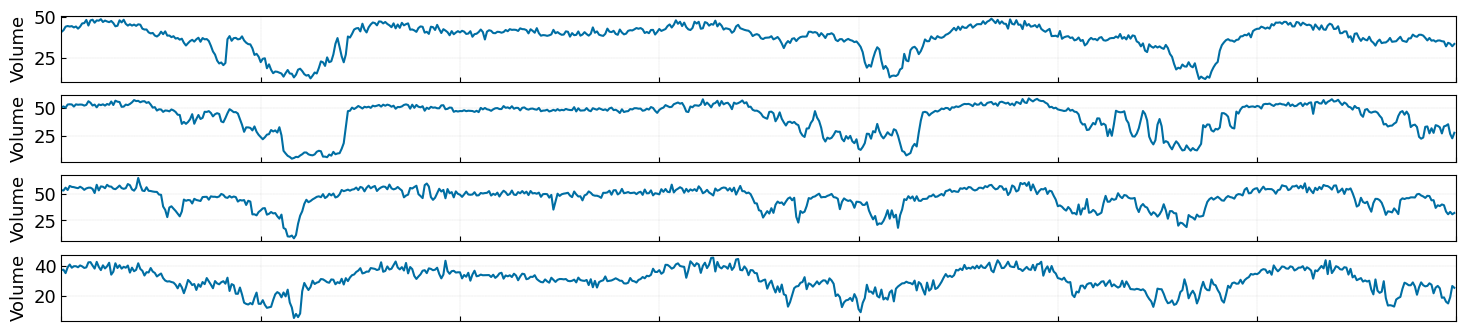

In [3]:
plt.rcParams['font.size'] = 13
plt.rcParams['figure.constrained_layout.use'] = False

fig = plt.figure(figsize = (18, 5))
Num = 5
D = 7
for loc in np.arange(0,Num-1,1):
    ax = fig.add_subplot(Num, 1, loc + 1)
    plt.plot(dense_mat[loc, : D * 96], color = "#006ea3", linewidth = 1.5)
    plt.xticks(np.arange(0, 96 * D + 1, 1 * 96))
    if loc != Num:
        plt.setp(ax.get_xticklabels(), visible = False)
    plt.grid(axis = 'both', linestyle = "--", linewidth = 0.1, color = 'gray')
    plt.ylabel('Volume')
    ax.tick_params(direction = "in")
    ax.set_xlim([0, D * 96])

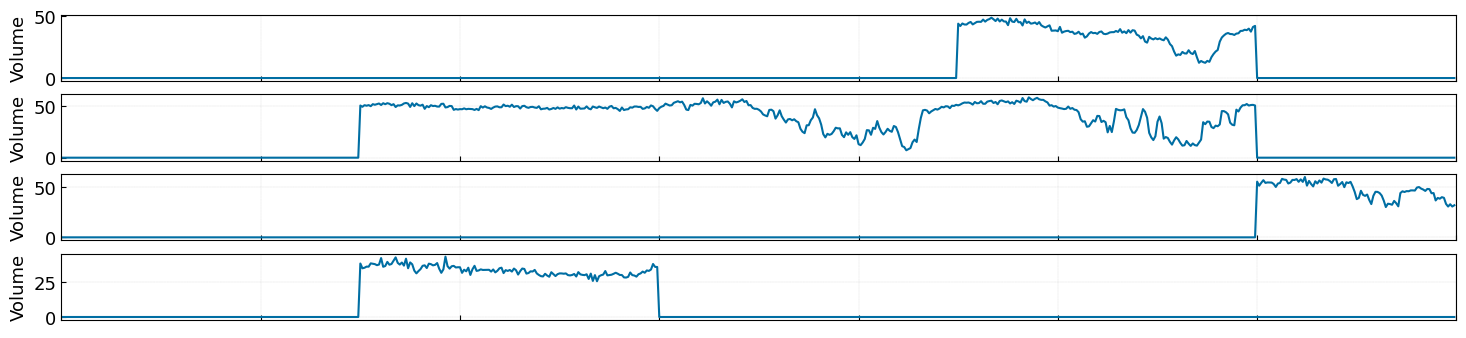

In [7]:
plt.rcParams['font.size'] = 13
plt.rcParams['figure.constrained_layout.use'] = False

fig = plt.figure(figsize = (18, 5))
Num = 5
D = 7
for loc in np.arange(0,Num-1,1):
    ax = fig.add_subplot(Num, 1, loc + 1)
    plt.plot(sparse_mat[loc, : D * 96], color = "#006ea3", linewidth = 1.5)
    plt.xticks(np.arange(0, 96 * D + 1, 1 * 96))
    if loc != Num:
        plt.setp(ax.get_xticklabels(), visible = False)
    plt.grid(axis = 'both', linestyle = "--", linewidth = 0.1, color = 'gray')
    plt.ylabel('Volume')
    ax.tick_params(direction = "in")
    ax.set_xlim([0, D * 96])